# Models Evaluation

## Part 1: What type of people are differeing the most? 

For this part, I examine the single and combo demographics to check the differences.

In [1]:
# load data

import pandas as pd

generic_mrp = pd.read_csv("Output/generic_mrp_results_district.csv")
specific_mrp = pd.read_csv("Output/specific_mrp_results_district.csv")
generic_slopes = pd.read_csv("Output/generic_mrp_results_district_slopes.csv")
specific_slopes = pd.read_csv("Output/specific_mrp_results_district_slopes.csv")
result = pd.read_csv("../2018_results.csv", encoding="cp1252")

### a. For multilevel-RP model

In [58]:
# calculate vote rate difference

people_1 = pd.DataFrame({"Demographic":generic_mrp.Demographic,
                         "Demographic_Type":generic_mrp.Demographic_Type,
                        "Difference (generic - specific)":generic_mrp.Vote_R - specific_mrp.Vote_R})
people_1 = people_1[people_1.Demographic_Type != 'District']

In [134]:
# custome palette

custom_palette = {}
for q in set(people_1.Demographic):
    score = people_1[people_1.Demographic==q]["Difference (generic - specific)"].item() 
    if score > 0 :
        custom_palette[q] = 'blue'
    else:
        custom_palette[q] = 'red'

In [91]:
# single demographic difference

single_dem = people_1[:25]
single_dem = single_dem.reindex(single_dem["Difference (generic - specific)"].abs().sort_values(ascending=False).index)
single_dem.reset_index(drop=True, inplace=True)

# single_dem.head(10)
# single_dem.to_csv("../single_dem.csv")

In [101]:
# combo
combo_dem = people_1[25:264]
combo_dem = combo_dem.reindex(combo_dem["Difference (generic - specific)"].abs().sort_values(ascending=False).index)
combo_dem.reset_index(drop=True, inplace=True)

# combo_dem.to_csv("../combo_dem.csv")

In [110]:
# triple
triple_dem = people_1[264:1544]
triple_dem = triple_dem.reindex(triple_dem["Difference (generic - specific)"].abs().sort_values(ascending=False).index)
triple_dem.reset_index(drop=True, inplace=True)

# triple_dem.to_csv("../triple_dem.csv")

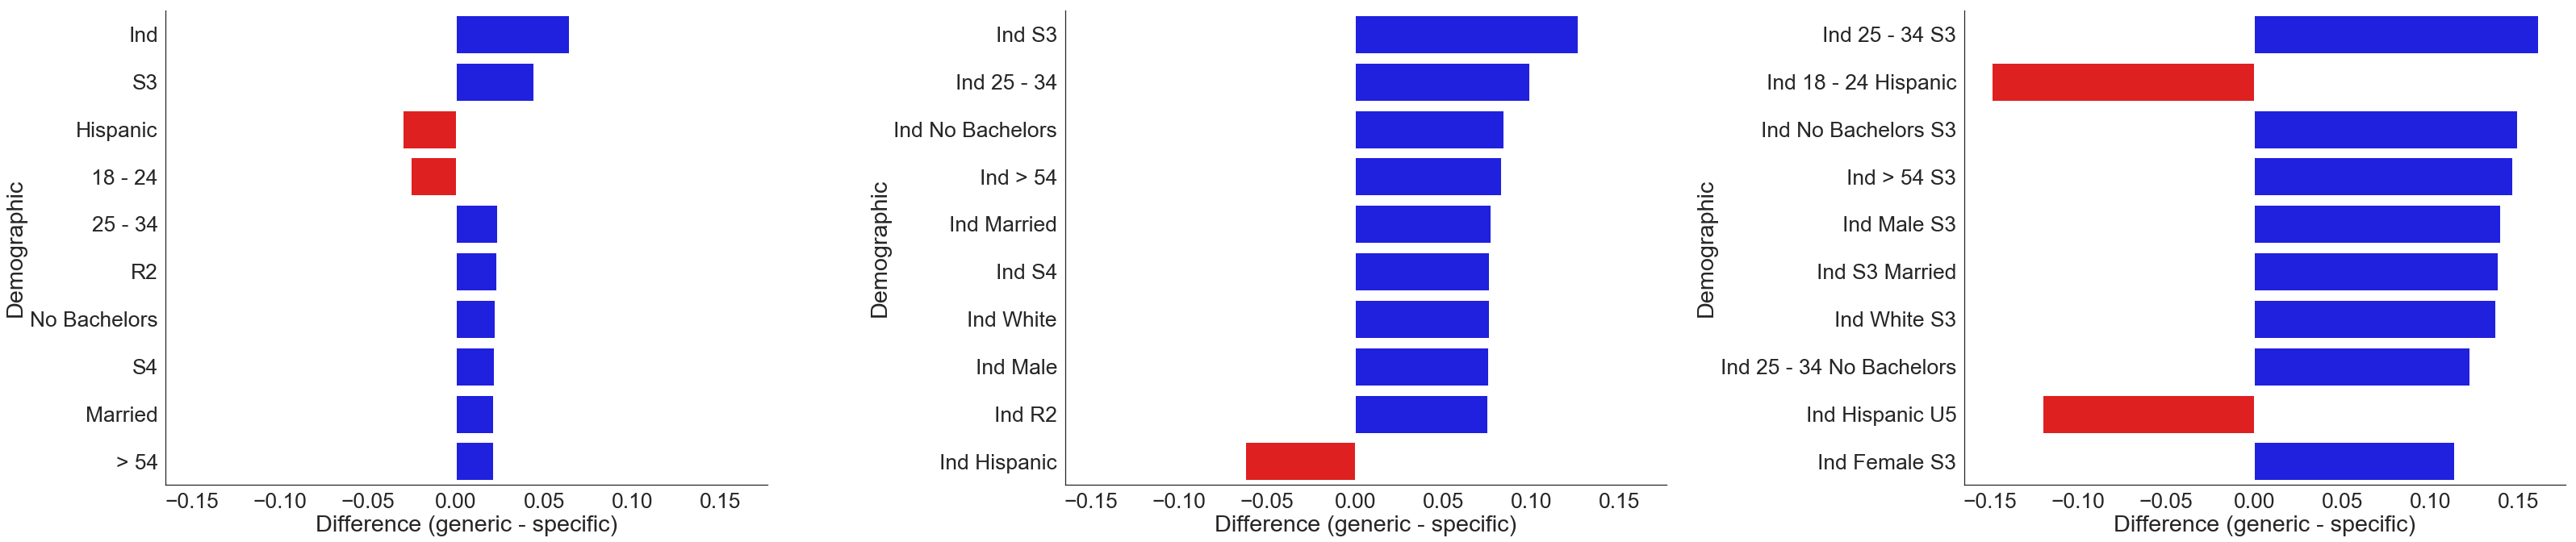

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "white", font_scale=2.4)
f, axes = plt.subplots(1, 3,
                       figsize=(45, 10),
                       sharex=True)

sns.barplot(y = single_dem[:10].Demographic,
            x = single_dem[:10]["Difference (generic - specific)"],
           palette = custom_palette,
           ax = axes[0])

sns.barplot(y = combo_dem[:10].Demographic,
            x = combo_dem[:10]["Difference (generic - specific)"],
           palette = custom_palette,
           ax = axes[1])

sns.barplot(y = triple_dem[:10].Demographic,
            x = triple_dem[:10]["Difference (generic - specific)"],
            palette = custom_palette,
           ax = axes[2])

sns.despine()
plt.tight_layout()
# plt.savefig("Poster/MRP_diff (from matplot).jpg", dpi=800)

### b. For Varying slope model 

In [203]:
# calculate vote rate difference

people_2 = pd.DataFrame({"Demographic":generic_slopes.Demographic,
                         "Demographic_Type":generic_slopes.Demographic_Type,
                        "Difference (generic - specific)":generic_slopes.Vote_R - specific_slopes.Vote_R})
people_2 = people_2[people_2.Demographic_Type != 'District']

In [204]:
# custome palette

custom_palette = {}
for q in set(people_2.Demographic):
    score = people_2[people_2.Demographic==q]["Difference (generic - specific)"].item() 
    if score > 0 :
        custom_palette[q] = 'blue'
    else:
        custom_palette[q] = 'red'

In [205]:
# single demographic difference

single_dem2 = people_2[:25]
single_dem2 = single_dem2.reindex(single_dem2["Difference (generic - specific)"].abs().sort_values(ascending=False).index)
single_dem2.reset_index(drop=True, inplace=True)

# single_dem2.to_csv("../single_dem2.csv")

# combo
combo_dem2 = people_2[25:264]
combo_dem2 = combo_dem2.reindex(combo_dem2["Difference (generic - specific)"].abs().sort_values(ascending=False).index)
combo_dem2.reset_index(drop=True, inplace=True)

# combo_dem2.to_csv("../combo_dem2.csv")

# triple
triple_dem2 = people_2[264:1544]
triple_dem2 = triple_dem2.reindex(triple_dem2["Difference (generic - specific)"].abs().sort_values(ascending=False).index)
triple_dem2.reset_index(drop=True, inplace=True)

# triple_dem2.to_csv("../triple_dem2.csv")

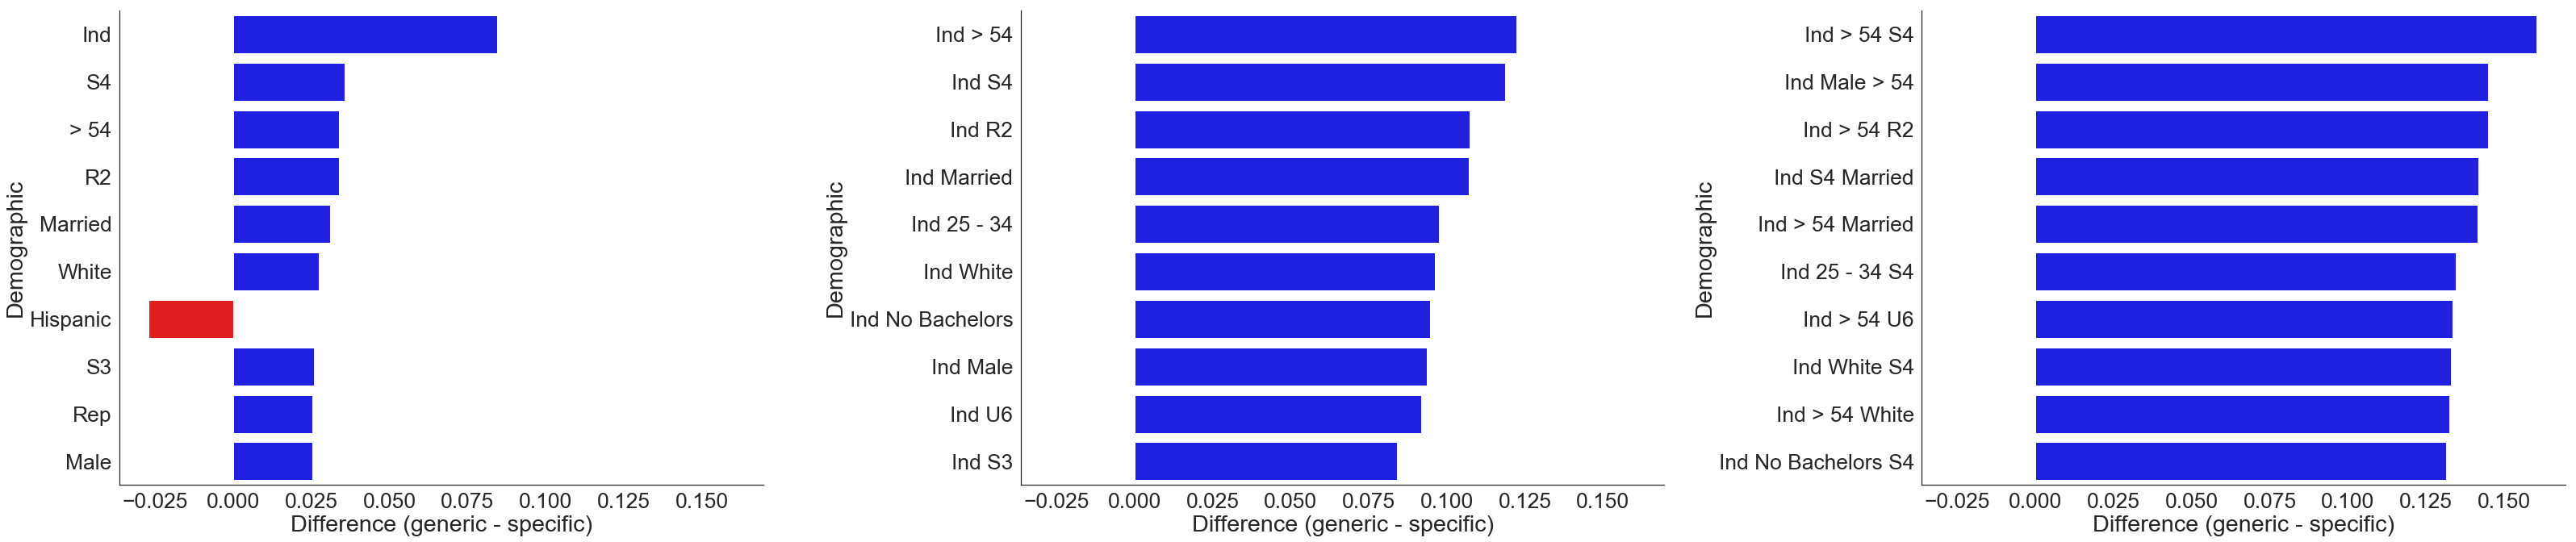

In [207]:
sns.set(style = "white", font_scale=2.4)
f, axes = plt.subplots(1, 3,
                       figsize=(45, 10),
                       sharex=True)

sns.barplot(y = single_dem2[:10].Demographic,
            x = single_dem2[:10]["Difference (generic - specific)"],
           palette = custom_palette,
           ax = axes[0])

sns.barplot(y = combo_dem2[:10].Demographic,
            x = combo_dem2[:10]["Difference (generic - specific)"],
           palette = custom_palette,
           ax = axes[1])

sns.barplot(y = triple_dem2[:10].Demographic,
            x = triple_dem2[:10]["Difference (generic - specific)"],
            palette = custom_palette,
           ax = axes[2])

sns.despine()
plt.tight_layout()
plt.savefig("Poster/Varying_slope_diff (from matplot).jpg", dpi=800)

## Part 2: Comparison on all congressional districts 

In [209]:
result = result[result.Dist.isin(generic_mrp.Demographic)]
result = result[['REP.', 'Dist']]
result = result[result['REP.'] != '—']
result = result[result['REP.'] != 'Unc.']
result['REP.'] = result['REP.'].str.rstrip('%').astype('float')/100

### a. Model performance on several metrics

Multilevel-RP VS Varying slop model

Multilevel-RP

In [211]:
generic_mrp = generic_mrp[generic_mrp.Demographic.isin(result.Dist)]
specific_mrp = specific_mrp[specific_mrp.Demographic.isin(result.Dist)]

In [212]:
specific_mrp = specific_mrp.sort_values(by = ['Demographic'])
generic_mrp = generic_mrp.sort_values(by = ['Demographic'])
result1 = result.sort_values(by = ['Dist'])
specific_mrp = specific_mrp.reset_index()
generic_mrp = generic_mrp.reset_index()
result1 = result.reset_index()

In [213]:
y_g = generic_mrp.Vote_R
y_s = specific_mrp.Vote_R
y_r = result['REP.']

In [269]:
import numpy as np
mse_g = np.mean((y_g - y_r)**2)
mse_s = np.mean((y_s - y_r)**2)
mse_g, mse_s

(0.049814190794928444, 0.04702637893917981)

In [220]:
# accuracy, in terms of whether republican is a majority 
y_g_acc = np.where(y_g > 0.5, 1,0)
y_s_acc = np.where(y_s > 0.5, 1,0)
y_r_acc = np.where(y_r > 0.5, 1,0)

In [270]:
accuracy_g = sum(y_g_acc == y_r_acc)/len(y_g)
accuracy_s = sum(y_s_acc == y_r_acc)/len(y_g)
accuracy_g, accuracy_s

(0.7912371134020618, 0.788659793814433)

In [277]:
# precision score
from sklearn.metrics import precision_score
precision_g = precision_score(y_g_acc, y_r_acc)
precision_s = precision_score(y_s_acc, y_r_acc)

precision_g, precision_s

(0.8085106382978723, 0.776595744680851)

In [278]:
# recall score
from sklearn.metrics import recall_score
recall_g = recall_score(y_g_acc, y_r_acc)
recall_s = recall_score(y_s_acc, y_r_acc)

recall_g, recall_s

(0.7715736040609137, 0.7849462365591398)

In [279]:
# f1 score
from sklearn.metrics import f1_score
f1_g = f1_score(y_g_acc, y_r_acc)
f1_s = f1_score(y_s_acc, y_r_acc)

f1_g, f1_s

(0.7896103896103895, 0.7807486631016043)

Varying slopes

In [223]:
generic_slopes = generic_slopes[generic_slopes.Demographic.isin(result.Dist)]
specific_slopes = specific_slopes[specific_slopes.Demographic.isin(result.Dist)]

In [224]:
specific_slopes = specific_slopes.sort_values(by = ['Demographic'])
generic_slopes = generic_slopes.sort_values(by = ['Demographic'])
result2 = result.sort_values(by = ['Dist'])
specific_slopes = specific_slopes.reset_index()
generic_slopes = generic_slopes.reset_index()
result2 = result.reset_index()

In [225]:
y_g_slopes = generic_slopes.Vote_R
y_s_slopes = specific_slopes.Vote_R
y_r_slopes = result['REP.']

In [275]:
mse_g_slopes = np.mean((y_g_slopes - y_r_slopes)**2)
mse_s_slopes = np.mean((y_s_slopes - y_r_slopes)**2)

mse_g_slopes, mse_s_slopes

(0.05006025176764361, 0.047359476303356456)

In [244]:
y_g_slopes_acc = np.where(y_g_slopes > 0.5, 1,0)
y_s_slopes_acc = np.where(y_s_slopes > 0.5, 1,0)
y_r_slopes_acc = np.where(y_r_slopes > 0.5, 1,0)

In [276]:
accuracy_g_slopes = sum(y_g_slopes_acc == y_r_slopes_acc)/len(y_g_slopes)
accuracy_s_slopes = sum(y_s_slopes_acc == y_r_slopes_acc)/len(y_g_slopes)

accuracy_g_slopes, accuracy_s_slopes

(0.7860824742268041, 0.788659793814433)

In [280]:
# precision score
precision_g_slopes = precision_score(y_g_slopes_acc, y_r_slopes_acc)
precision_s_slopes = precision_score(y_s_slopes_acc, y_r_slopes_acc)

precision_g_slopes, precision_s_slopes

(0.824468085106383, 0.776595744680851)

In [281]:
# recall score
recall_g_slopes = recall_score(y_g_slopes_acc, y_r_slopes_acc)
recall_s_slopes = recall_score(y_s_slopes_acc, y_r_slopes_acc)

recall_g_slopes, recall_s_slopes

(0.7560975609756098, 0.7849462365591398)

In [282]:
# f1 score
f1_g_slopes = f1_score(y_g_slopes_acc, y_r_slopes_acc)
f1_s_slopes = f1_score(y_s_slopes_acc, y_r_slopes_acc)

f1_g_slopes, f1_s_slopes

(0.7888040712468194, 0.7807486631016043)

In [284]:
# write to csv

Comparison = {'Model':['Multilevel-RP', 'Multilevel-RP','Varying slopes','Varying slopes'],
              'Data':['generic', 'specific','generic', 'specific'],
              'Accuracy':[accuracy_g, accuracy_s, accuracy_g_slopes, accuracy_s_slopes],
              'MSE':[mse_g, mse_s, mse_g_slopes, mse_s_slopes],
             'Precision':[precision_g, precision_s, precision_g_slopes, precision_s_slopes],
             'Recall':[recall_g, recall_s, recall_g_slopes, recall_s_slopes],
             'f1':[f1_g, f1_s, f1_g_slopes, f1_s_slopes]}

df = pd.DataFrame(Comparison)

In [286]:
# df.to_csv("Model_comparison.csv")

### b. Callibration-plots

In [267]:
from sklearn.calibration import calibration_curve

general_x, general_y = calibration_curve(y_r_acc, y_g, n_bins = 10)
specific_x, specific_y = calibration_curve(y_r_acc, y_s, n_bins = 10)

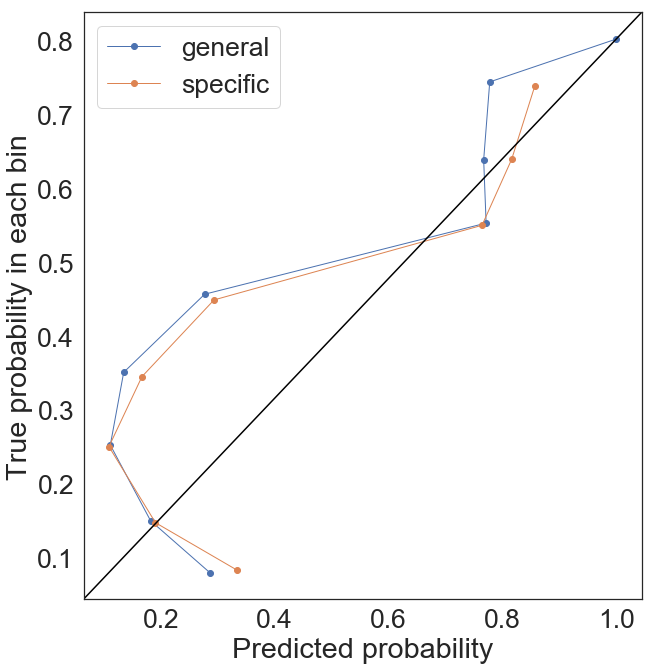

In [291]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize = (10,10))
# only these two lines are calibration curves
plt.plot(general_x, general_y, marker='o', linewidth=1, label='general')
plt.plot(specific_x, specific_y, marker='o', linewidth=1, label='specific')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
fig.subplots_adjust(top=0.94)
plt.legend()
plt.show()

In [295]:
# fig.savefig("Poster/Calibration_multilevel (matplot).jpg", dpi=800)

In [288]:
# for varying slopes model

general_x_slopes, general_y_slopes = calibration_curve(y_r_slopes_acc, y_g_slopes, n_bins = 10)
specific_x_slopes, specific_y_slopes = calibration_curve(y_r_slopes_acc, y_s_slopes, n_bins = 10)

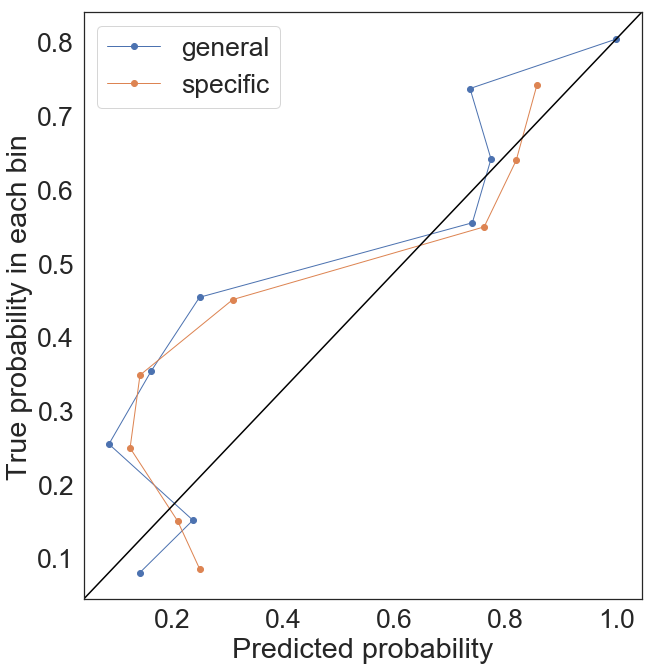

In [293]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots(figsize = (10,10))
# only these two lines are calibration curves
plt.plot(general_x_slopes, general_y_slopes, marker='o', linewidth=1, label='general')
plt.plot(specific_x_slopes, specific_y_slopes, marker='o', linewidth=1, label='specific')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
fig.subplots_adjust(top=0.94)
plt.legend()
plt.show()

In [296]:
# fig.savefig("Poster/Calibration_varying_slopes (matplot).jpg", dpi=800)

In [290]:
# calibration1  = {"y_r_acc":y_r_acc,
#                  "y_g":y_g,
#                  "y_s":y_s,
#                 "y_g_slopes":y_g_slopes,
#                 "y_s_slopes":y_s_slopes}

# calibration1 = pd.DataFrame(calibration1)

# calibration1.to_csv("../calibration1.csv")

## Part 3: Comparison on selected 40 districts 

### a. Model performance on several metrics

Multilevel-RP VS Varying slop model

### b. Callibration-plots

# TODO: use R to re-plot all the visuals